# **Matplotlib**
---
> [`matplotlib`](https://matplotlib.org/stable/index.html) is a comprehensive library for creating static, animated, and interactive visualizations.

>> I've done an in-depth coverage of `matplotlib` on my GitHub repository linked [`here`](https://github.com/Martinmbiro/Data-Pre-processing-and-Visualization)

### Loading data from the previous notebook

In [ ]:
import pandas as pd

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
students = pd.read_csv('grades.csv', delimiter=',', header='infer')

# Remove any rows with missing data
students.dropna(axis="index", how="any", inplace=True)

# Create a new column to indicate students who have who passed
# and add that to the Pandas dataframe (Passing Grade is 60)
students["Pass"] = students["Grade"] >= 60

In [ ]:
# A little peek into the data
students.head()

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False


### Visualize the Data

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Specify the Stylesheet
plt.style.use("fast")

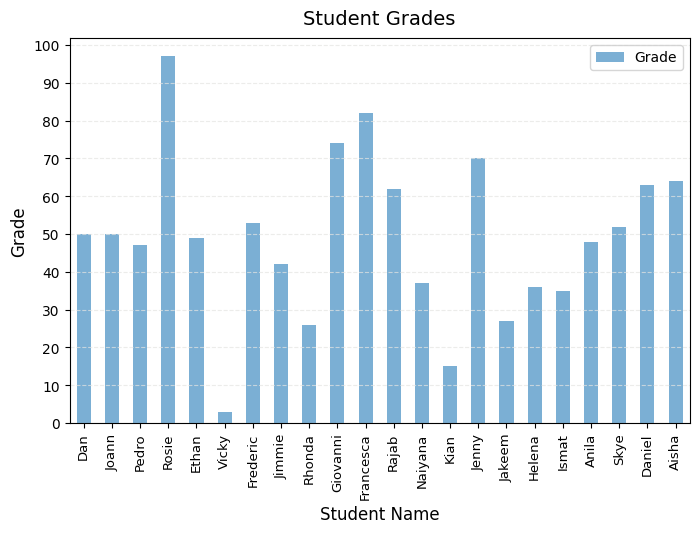

In [ ]:
# Plot a bar graph of the names vs Grades (the pandas way)
students.plot.bar(x="Name", y="Grade", figsize=(8,5), color="#7bafd4")

# Customize using Matplotlib function calls
plt.xlabel("Student Name", fontsize=12)
plt.ylabel("Grade", fontsize=12)
plt.xticks(fontsize=9.5)
plt.yticks(range(0, 110, 10))
plt.title("Student Grades", fontsize=14, pad=10)
plt.grid(axis="y", color="#e5e4e2", linestyle="--", alpha=0.7)

plt.show()

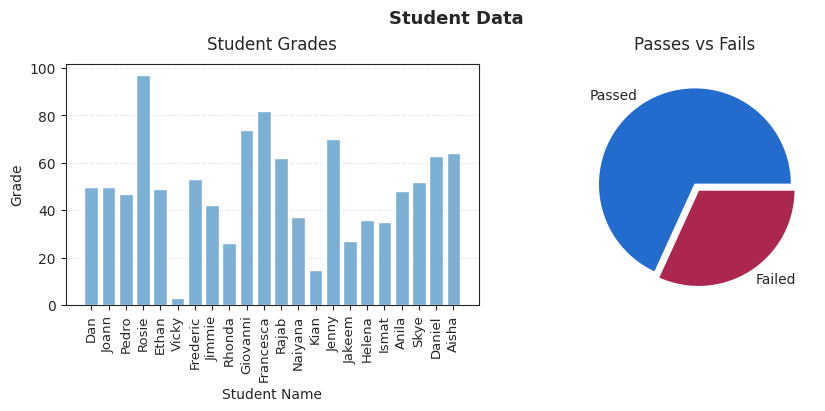

In [ ]:
"""
  Create a subplot with a bar graph on the first axes,
    pie chart on the second axes, showing the proportion of students that failed / passed
"""
# Specify a subplot with two axes: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(9, 4), layout="constrained")

# Bar plot first
axs[0].bar(x=students["Name"], height=students["Grade"], color="#7bafd4")
axs[0].set_xticks(students["Name"], students["Name"], rotation=90, fontsize=9.5)
axs[0].grid(axis="y", color="#e5e4e2", linestyle="--", alpha=0.7)
axs[0].set_title("Student Grades", pad=10)
axs[0].set_xlabel("Student Name")
axs[0].set_ylabel("Grade")


# Now the pie chart
axs[1].pie(students["Pass"].value_counts(),
           labels=["Passed", "Failed"],
           colors=["#246bce", "#ab274f"],
           explode=[0, 0.07])
axs[1].set_title("Passes vs Fails", pad=10)


# Suptitle to the subplot
fig.suptitle("Student Data", fontsize=13, weight="heavy")

plt.show()

### Statistical Analysis
> Time to analyze the data. A lot of data science is rooted in statistics, hence, some basic statistical analysis ensue.

#### Descriptive statistics and data distribution
> Let's examine the distribution (how all the different data values are spread across the sample) of the student grades.  

> The starting point for this exploration is often to visualize the data as a histogram and see how frequently each value for the variable occurs.

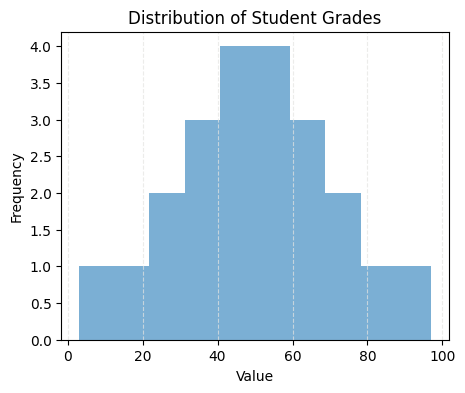

In [ ]:
# Examine the students grades using a Histogram
students["Grade"].plot.hist(color="#7bafd4", figsize=(5,4))

# Add titles and labels
plt.title('Distribution of Student Grades')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis="x", color="#e5e4e2", linestyle="--", alpha=0.7)


plt.show()

#### Measure of central tendency
> Common ways to define the measure of central tendency (middle of the data) include `mean`, `mode` and `median`

In [ ]:
# Statistical values for Grade
min_grade = students["Grade"].min()
max_grade = students["Grade"].max()
mean_grade = round(students["Grade"].mean(), 1)
med_grade = students["Grade"].median()
# Accessing the value at index 0 since it returns a series even if it's one value
mod_grade = students["Grade"].mode()[0]

# Print values
print(f"Min Grade: {min_grade} \nMax Grade: {max_grade} \nMean: {mean_grade} \nMode: {mod_grade}, \nMedian: {med_grade}")

Min Grade: 3.0 
Max Grade: 97.0 
Mean: 49.2 
Mode: 50.0, 
Median: 49.5


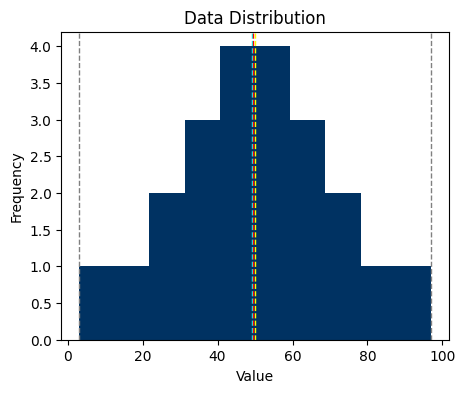

In [ ]:
# Plot a histogram
students["Grade"].plot.hist(color="#003262", figsize=(5,4))

# Add lines for the statistics
plt.axvline(x=min_grade, color = 'gray', linestyle='--', linewidth = 1)
plt.axvline(x=mean_grade, color = 'cyan', linestyle='--', linewidth = 1)
plt.axvline(x=med_grade, color = 'red', linestyle='--', linewidth = 1)
plt.axvline(x=mod_grade, color = 'yellow', linestyle='--', linewidth = 1)
plt.axvline(x=max_grade, color = 'gray', linestyle='--', linewidth = 1)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

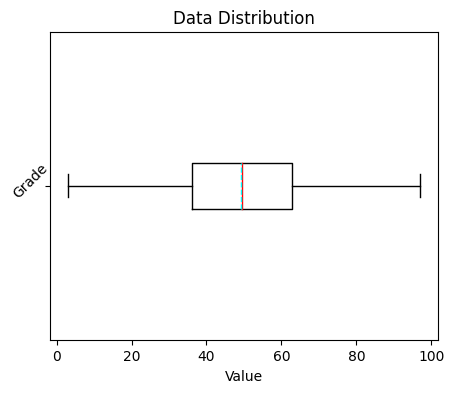

In [ ]:
# Another way to visualize the distribution of a variable is to use a box plot
plt.figure(figsize=(5,4))
plt.boxplot(x=students["Grade"],
            showfliers=True,
            showmeans=True,
            meanline=True,
            meanprops = dict(color = 'cyan', linestyle='dashed', linewidth = 1),
            medianprops= dict(color = 'red', linestyle='-', linewidth = 1),
            vert=False)
plt.gca().set_yticklabels([])
plt.ylabel("Grade", rotation=45)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')

plt.show()

In [ ]:
# Creating a re-usable function for analysing data using histogram and boxplot
def show_distribution(val_provided):
  # Statistical values for Grade
  min_val = val_provided.min()
  max_val = val_provided.max()
  mean_val = round(val_provided.mean(), 1)
  med_val = val_provided.median()
  # Accessing the value at index 0 since it returns a series even if it's one value
  mod_val = val_provided.mode()[0]

  # Print values
  print(f"Min: {min_val} \nMax: {max_val} \nMean: {mean_val} \nMode: {mod_val}, \nMedian: {med_val}\n\n")

  # Import matplotlib and specify stylesheet
  import matplotlib.pyplot as plt
  plt.style.use("fast")

  # Specify a subplot with two axes: 2 row, 1 column
  fig, axs = plt.subplots(2, 1, figsize=(5, 7), layout="constrained", sharex=True)

  # Histogram plot first
  axs[0].hist(x=val_provided, color="#003262")

  # Add lines for the statistics
  axs[0].axvline(x=min_val, color = 'gray', linestyle='--', linewidth = 1)
  axs[0].axvline(x=mean_val, color = 'cyan', linestyle='--', linewidth = 1)
  axs[0].axvline(x=med_val, color = 'red', linestyle='--', linewidth = 1)
  axs[0].axvline(x=mod_val, color = 'yellow', linestyle='--', linewidth = 1)
  axs[0].axvline(x=max_val, color = 'gray', linestyle='--', linewidth = 1)
  axs[0].set_ylabel("Frequency")


  # Now the box plot
  axs[1].boxplot(x=val_provided,
              showfliers=True,
              showmeans=True,
              meanline=True,
              meanprops = dict(color = 'cyan', linestyle='dashed', linewidth = 1),
              medianprops= dict(color = 'red', linestyle='-', linewidth = 1),
              vert=False)
  axs[1].set_yticklabels([])
  axs[1].set_ylabel(val_provided.name, rotation=45)

  plt.xlabel('Value')

  # Suptitle to the subplot
  fig.suptitle(val_provided.name + " Data Distribution", fontsize=13)
  plt.show()

Min: 3.0 
Max: 97.0 
Mean: 49.2 
Mode: 50.0, 
Median: 49.5




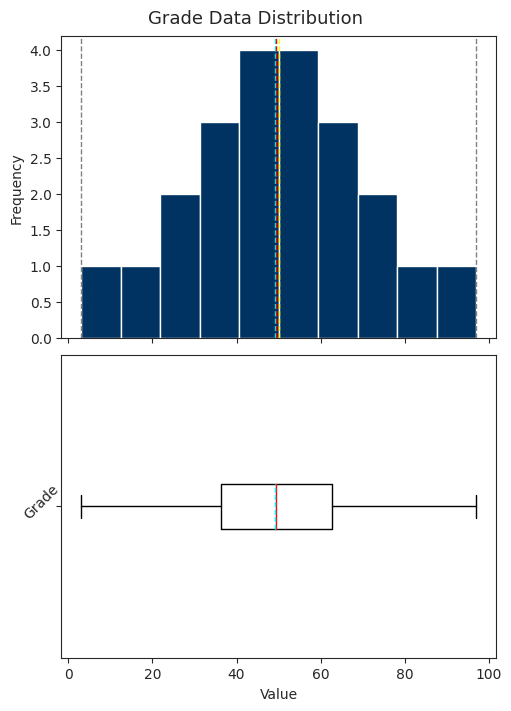

In [ ]:
# Call the show_distribution() function on the student Grade
show_distribution(students["Grade"])

##### Adding in a Kernel Density Estimation (KDE) with [`Seaborn`](https://seaborn.pydata.org/)

In [ ]:
# Create a function that show the probability density function of a value
def show_density(var_data):
    # Importing matplotlib and setting sytlesheet
    import matplotlib.pyplot as plt
    plt.style.use("fast")

    # Importing Seaborn
    import seaborn as sns
    sns.set_style("ticks")

    plt.figure(figsize=(5,4))

    # Plot Histogram with density
    sns.histplot(data=var_data, kde=True)

    # Add titles and labels
    plt.title(var_data.name + ' Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 1)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 1)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 1)
    plt.ylabel("Frequency")

    # Show the figure
    plt.show()

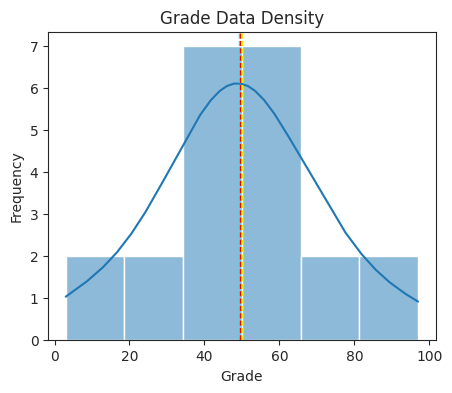

In [ ]:
# Show density of Students' Grades
show_density(students["Grade"])

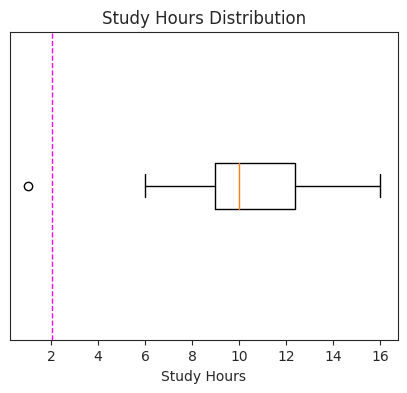

In [ ]:
"""
  Show boxplot disribution of the Students' Study hours
"""
# A line is drawn at the 0.01th percentile of the data
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))

# Generate box plot and draw line at 0,01th percentile of study hours
plt.boxplot(x=students["StudyHours"], vert=False)
plt.axvline(x=students["StudyHours"].quantile(0.01), color="magenta", linewidth=1, linestyle="--")
plt.yticks([])
plt.xlabel("Study Hours")
plt.title("Study Hours Distribution")

plt.show()

0.01th Percentile: 2.05




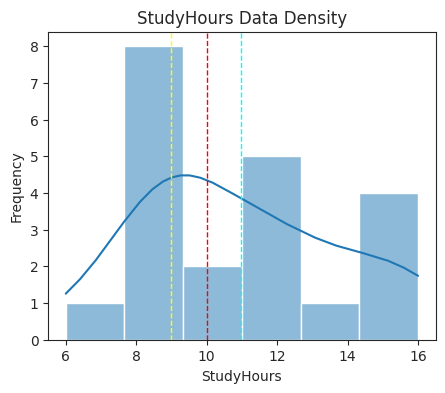

In [ ]:
# Show density of Students' Study Hours

# calculate the 0.01th percentile
q01 = students["StudyHours"].quantile(0.01)

print(f"0.01th Percentile: {q01}\n\n")

# Get the variable to examine
col = students[students["StudyHours"]>q01]['StudyHours']
# Call the function
show_density(col)

"""A right skewed distribution"""